In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Этот набор данных включает результаты трех экзаменов и различные личные, социальные и экономические факторы, которые оказывают на них влияние.

In [88]:
print(df.shape)

(1000, 8)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Text(0.5, 1.0, 'Количество девушек и парней')

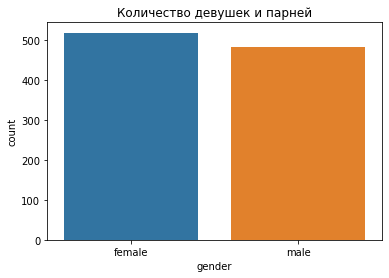

In [90]:
sns.countplot(data=df,x='gender' )
plt.title('Количество девушек и парней')

Девушек в датасете больше мужчин

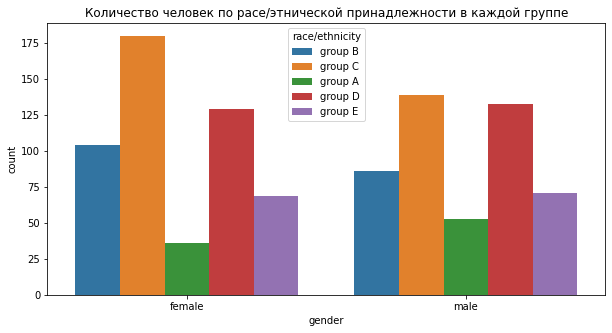

In [91]:
plt.figure(figsize=[10,5])
ax=sns.countplot(data=df,x='gender',hue='race/ethnicity')
plt.title('Количество человек по расе/этнической принадлежности в каждой группе');

Больше всего людей из группы C, меньше всего из А

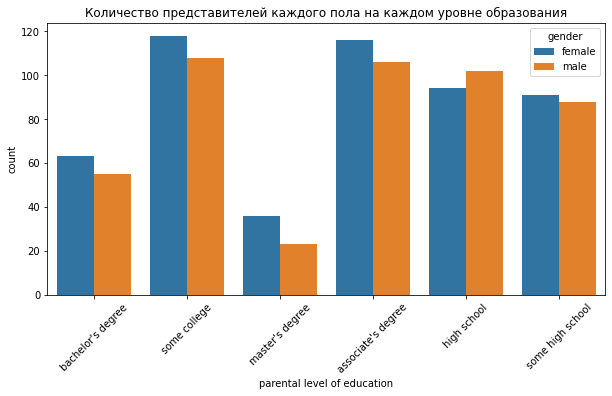

In [92]:
plt.figure(figsize=[10,5])
ax=sns.countplot(data=df,x='parental level of education',hue='gender')
plt.xticks(rotation=45)
plt.title('Количество представителей каждого пола на каждом уровне образования');

Родителей с высшим образованием (бакалавры, магистры) меньше всего 

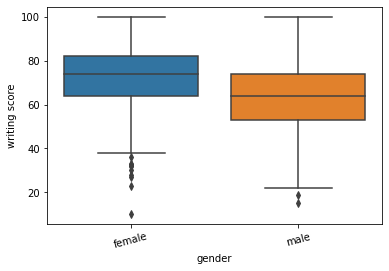

In [93]:
sns.boxplot(data=df, x='gender', y='writing score')
plt.xticks(rotation=15);

Средний балл девушек по письму больше чем у парней

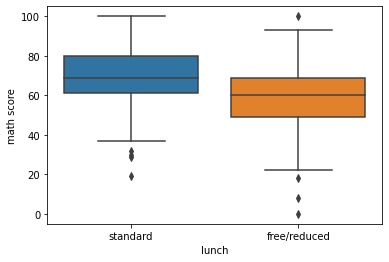

In [94]:
top_score = df.lunch.value_counts().sort_values(ascending=False).head(3).index.values
top_score
ax = sns.boxplot(x="lunch", y="math score", 
            data=df[df.lunch.isin(top_score)])

In [95]:
top_writing_score = df.groupby('test preparation course')[['writing score']].sum()\
    .sort_values('writing score', ascending = False).head()
top_writing_score.style.bar()

,writing score
test preparation course,
none,41412
completed,26642


<AxesSubplot:ylabel='test preparation course'>

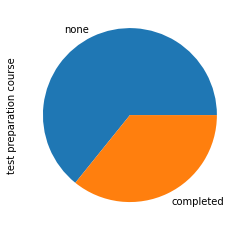

In [96]:
test_count = df['test preparation course'].value_counts()
test_count.plot(kind='pie', rot='45', y='Count')

Те, кто не проходил курсы подготовки, набрали больше баллов по письму. Но количество прошедших подготовку меньше

Переведем некоторые значения в числовые

In [97]:
df['lunch']=df['lunch'].replace({'standard':1, 'free/reduced':0})

In [98]:
df['race/ethnicity']=df['race/ethnicity'].replace({'group B':1, 'group C':2, 'group A':3, 'group D':4, 'group E':5})

In [99]:
df['parental level of education']=df['parental level of education'].replace({"bachelor's degree":1, 'some college':2, "master's degree":3,
       "associate's degree":4, 'high school':5, 'some high school':6})

In [100]:
df['test preparation course']=df['test preparation course'].replace({'completed':1, 'none':0})

<AxesSubplot:xlabel='parental level of education'>

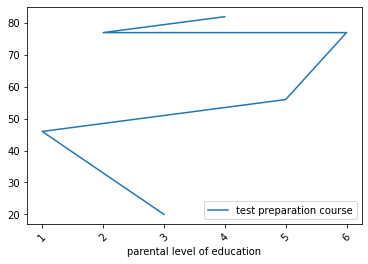

In [101]:
df1 = df.groupby('parental level of education')[['test preparation course']].sum()\
    .sort_values('test preparation course', ascending = False)
df1.plot(rot=45)

Родители с высшим образованием не отдавали детей на доп подгтовку к тесту

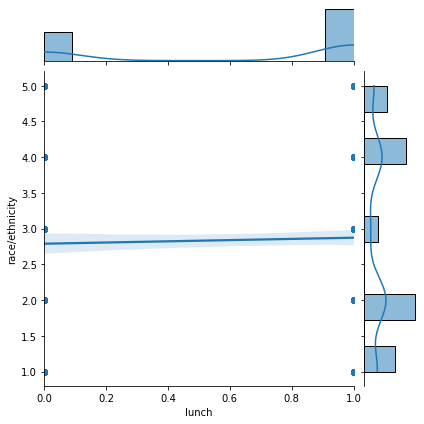

In [102]:
sns.jointplot(x='lunch', y='race/ethnicity', 
              data=df, kind='reg')

Доступность обеда не связана с расовой/этнической особенностью

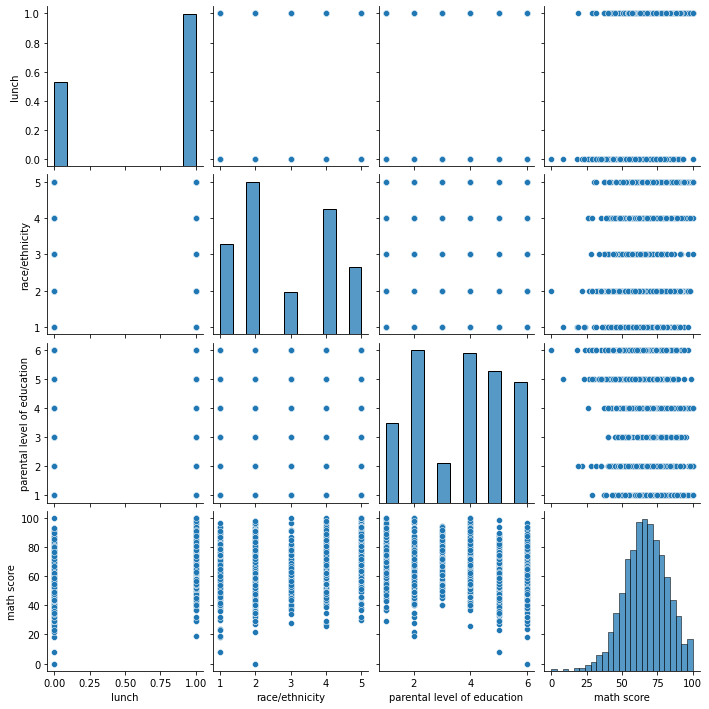

In [103]:
sns_plot = sns.pairplot(
    df[['lunch','race/ethnicity', 'parental level of education','math score']])
sns_plot

Не видим никакой зависимости, все распределено равномерно, проверим это с помощью числовых значений ниже:

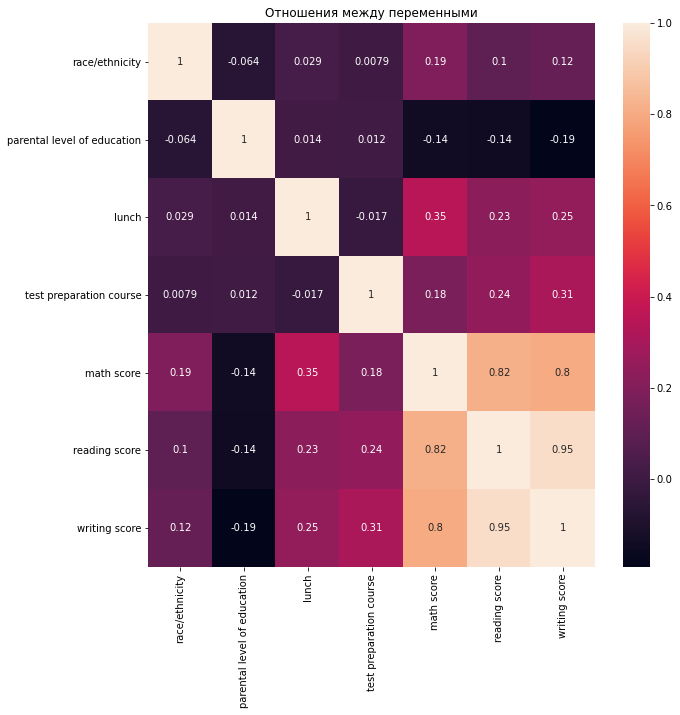

In [104]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.title('Отношения между переменными');

Как видим, этническая/расовая принадлежность, доступность обеда (стандартная/бесплатная) и уровень образования родителей не влияют на уровень экзаменов. Чтение, математика и письмо имеют довольно сильную связь между собой